In [1]:
from importlib import reload
from model_trainer import ModelTrainer
from importlib import reload
from train import download_and_unpack_dataset, train

import json

In [2]:
root_dir = "/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn"

config_file = open(root_dir + "/trainer_config.json", 'r')
config = json.load(config_file)
config_file.close()

print(config)

{'model_name': 'Plain18Layer', 'store_model_dir_rel_path': '/savedmodels', 'train_dataset_dir_rel_path': '/data/cifar10/train', 'test_dataset_dir_rel_path': '/data/cifar10/test', 'dataset_root_dir_rel_path': '/data', 'random_seed': 420, 'batch_size': 256, 'epochs': 40, 'learning_rate_start': 0.1, 'weight_decay': 0.0001, 'momentum': 0.9, 'lr_reduce_patience': 10}


In [3]:
download_and_unpack_dataset(root_dir + config['dataset_root_dir_rel_path'])

Data already downloaded


In [ ]:
train(root_dir, config)

Load train data from /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/train
Load test data from /home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/test
Detected device:  cpu
Epoce: 0


## Load model and test
Here we load different fitted models and display their performance

In [3]:
from model_wrapper import ModelWrapper
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data.dataloader import DataLoader
import json
import matplotlib.pyplot as plt

In [4]:

test_dataset = ImageFolder(
    root="/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/data/cifar10/test",
    transform=ToTensor()
)
# Create DataLoader
test_data_loader = DataLoader(
    dataset=test_dataset,
    batch_size=256,
    shuffle=True,
    num_workers=4,
    pin_memory=False  # should be True if cuda is available
)

In [5]:
def plot_learn_curve(val_metric_key, train_metric_key, training_run):
    val_losses = [x[val_metric_key] for x in training_run['training_history']]
    train_losses = [x[train_metric_key] for x in training_run['training_history']]
    plt.plot(val_losses, label=val_metric_key)
    plt.plot(train_losses, label=train_metric_key)
    plt.xlabel("epoch")
    plt.legend()
    plt.show()

## Plain18Layer
This model resembles the 18 Layer CNN from the ResNet paper as close as possible.
The ModelTrainer uses SGD with same parameters and reduce learning rate on plateau strategy.

In [6]:
from model_plain_18_layer import Plain18Layer

model_subfolder_path = "/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/savedmodels/Plain18Layer_20231203_2213"
# Load the model, which is just the nn.Module containing the CNN architecture and a forward function
model = Plain18Layer()
# The model wrapper adds functions for training and evaluation on top of the underlying model
model_wrapper = ModelWrapper(model)
# Load the already fitted weights into the model architecture
model_wrapper.load_model_weights(model_subfolder_path + "/model_state_dict")
# Evaluate the model on the test data
model_wrapper.evaluate_model(test_data_loader)

{'mean_loss': 1.7039111852645874, 'mean_acc': 0.756542980670929}

In [7]:
training_run_file = open(model_subfolder_path + "/training_run.json", "r")
training_run = json.load(training_run_file)
training_run_file.close()

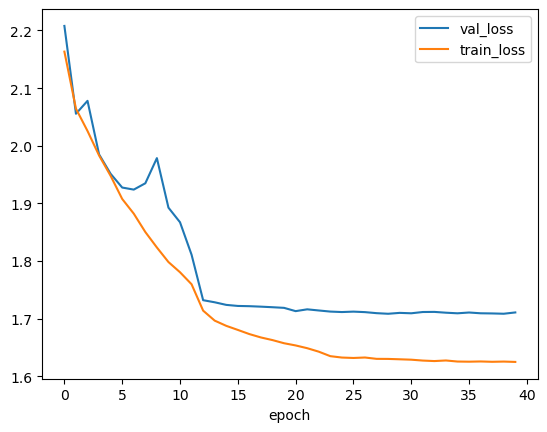

In [11]:
plot_learn_curve("val_loss", "train_loss", training_run)

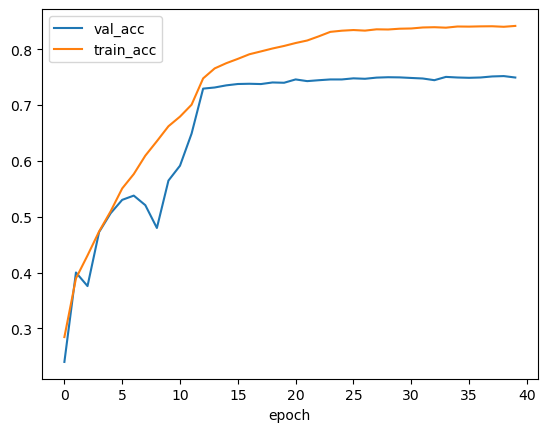

In [12]:
plot_learn_curve("val_acc", "train_acc", training_run)

### Plain32Layer

In [6]:
from model_plain_32_layer import Plain32Layer

model_subfolder_path = "/home/erik/Desktop/WiSe2023_24/xAI-Proj-M/xAI-Proj-M/custom_cnn/savedmodels/Plain18Layer_20231203_2213"
# Load the model, which is just the nn.Module containing the CNN architecture and a forward function
model = Plain32Layer()
# The model wrapper adds functions for training and evaluation on top of the underlying model
model_wrapper = ModelWrapper(model)
# Load the already fitted weights into the model architecture
# model_wrapper.load_model_weights(model_subfolder_path + "/model_state_dict")
# Evaluate the model on the test data
model_wrapper.evaluate_model(test_data_loader)

{'mean_loss': 2.3026223182678223, 'mean_acc': 0.09765625}